In [1]:
###################################################################################
#
#   Elemental Statistics Toolbox for Design of Experiments
#
# Elemental set of statistics tools to perform basic descriptions of the data
#
####################################################################################

In [6]:
import numpy as np
import pandas as pd

def descriptive_statistics(data):
    """
    Calculate basic descriptive statistics for a dataset.
    
    Parameters:
        data (array-like): Input data (list, numpy array, or pandas series).
    
    Returns:
        dict: Dictionary with descriptive statistics.
    """
    data = np.array(data)
    stats = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Mode': pd.Series(data).mode().iloc[0] if not pd.Series(data).mode().empty else None,
        'Standard Deviation': np.std(data, ddof=1),  # Sample SD
        'Variance': np.var(data, ddof=1),  # Sample Variance
        'Range': np.ptp(data),
        'Min': np.min(data),
        'Max': np.max(data),
        'IQR': np.percentile(data, 75) - np.percentile(data, 25),
        'Count': len(data),
        'Sum': np.sum(data),
        'Coefficient of Variation': (np.std(data, ddof=1) / np.mean(data)) if np.mean(data) != 0 else None
    }
    return stats

def print_single_dataset(data, label="Dataset"):
    """
    Print descriptive statistics for a single dataset in a table format.
    
    Parameters:
        data: Input dataset (array-like).
        label: Label for the dataset.
    """
    stats = descriptive_statistics(data)
    
    # Print header
    print(f"{label} Statistics")
    print("-" * 40)
    print(f"{'Statistic':<25} {'Value':<15}")
    print("-" * 40)
    
    # Print each statistic line by line
    for stat_name, value in stats.items():
        print(f"{stat_name:<25} {value:<15}")
    print("-" * 40)

# Example Usage for Single Dataset
data = [16.85, 16.40, 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59, 16.57]
print_single_dataset(data, label="Dataset A")


Dataset A Statistics
----------------------------------------
Statistic                 Value          
----------------------------------------
Mean                      16.764000000000003
Median                    16.72          
Mode                      16.35          
Standard Deviation        0.31644553682707827
Variance                  0.10013777777777776
Range                     0.8599999999999994
Min                       16.35          
Max                       17.21          
IQR                       0.4875000000000007
Count                     10             
Sum                       167.64000000000001
Coefficient of Variation  0.018876493487656777
----------------------------------------


In [4]:
import numpy as np
import pandas as pd

def descriptive_statistics(data):
    """
    Calculate basic descriptive statistics for a dataset.
    
    Parameters:
        data (array-like): Input data (list, numpy array, or pandas series).
    
    Returns:
        dict: Dictionary with descriptive statistics.
    """
    data = np.array(data)
    stats = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Mode': pd.Series(data).mode().iloc[0] if not pd.Series(data).mode().empty else None,
        'Standard Deviation': np.std(data, ddof=1),  # Sample SD
        'Variance': np.var(data, ddof=1),  # Sample Variance
        'Range': np.ptp(data),
        'Min': np.min(data),
        'Max': np.max(data),
        'IQR': np.percentile(data, 75) - np.percentile(data, 25),
        'Count': len(data),
        'Sum': np.sum(data),
        'Coefficient of Variation': (np.std(data, ddof=1) / np.mean(data)) if np.mean(data) != 0 else None
    }
    return stats

def print_statistics(data1, data2, labels=('Dataset A', 'Dataset B')):
    """
    Calculate and print descriptive statistics for two datasets in tabular format.
    
    Parameters:
        data1, data2: Input datasets (array-like).
        labels: Tuple of labels for the datasets.
    """
    stats1 = descriptive_statistics(data1)
    stats2 = descriptive_statistics(data2)
    
    # Print header
    print(f"{'Statistic':<25} {labels[0]:<15} {labels[1]:<15}")
    print("-" * 55)
    
    # Print each statistic line by line
    for stat_name in stats1.keys():
        print(f"{stat_name:<25} {stats1[stat_name]:<15} {stats2[stat_name]:<15}")

# Example Usage
data_A = [16.85, 16.40, 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59, 16.57]
data_B = [16.62, 16.75, 17.37, 17.12, 16.98, 16.87, 17.34, 17.02, 17.08, 17.27]

print_statistics(data_A, data_B)

Statistic                 Dataset A       Dataset B      
-------------------------------------------------------
Mean                      16.764000000000003 17.042000000000005
Median                    16.72           17.049999999999997
Mode                      16.35           16.62          
Standard Deviation        0.31644553682707827 0.24791575630084936
Variance                  0.10013777777777776 0.06146222222222213
Range                     0.8599999999999994 0.75           
Min                       16.35           16.62          
Max                       17.21           17.37          
IQR                       0.4875000000000007 0.33500000000000085
Count                     10              10             
Sum                       167.64000000000001 170.42000000000004
Coefficient of Variation  0.018876493487656777 0.0145473392970807


In [3]:
def dataframe_statistics(df, columns=None):
    """
    Generate descriptive statistics for specific columns in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input data.
        columns (list, optional): Columns to analyze. If None, analyze all numeric columns.
    
    Returns:
        pd.DataFrame: DataFrame with descriptive statistics.
    """
    if columns is None:
        columns = df.select_dtypes(include='number').columns
    return df[columns].describe().T

# Example Usage
data = pd.DataFrame({'Factor A': [5, 7, 8, 5, 6], 
                     'Factor B': [10, 15, 14, 10, 13]})
print(dataframe_statistics(data))

          count  mean       std   min   25%   50%   75%   max
Factor A    5.0   6.2  1.303840   5.0   5.0   6.0   7.0   8.0
Factor B    5.0  12.4  2.302173  10.0  10.0  13.0  14.0  15.0


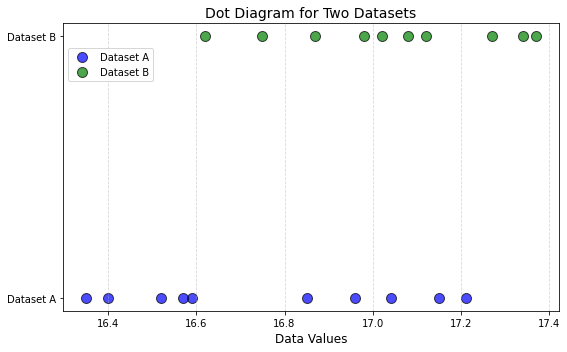

In [16]:
import matplotlib.pyplot as plt

def plot_dot_diagram(data1, data2, labels=('Dataset A', 'Dataset B'), legend_loc='upper right'):
    """
    Generate a Dot Diagram for two datasets with customizable legend position.
    
    Parameters:
        data1, data2: Input datasets (array-like).
        labels: Tuple of labels for the datasets.
        legend_loc: Position of the legend (string or tuple).
                   Examples: 'upper right', 'lower left', (0.5, 0.5).
    """
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Define positions for the datasets on the y-axis
    y1 = [1] * len(data1)  # All points for data1 are plotted at y=1
    y2 = [2] * len(data2)  # All points for data2 are plotted at y=2

    # Scatter plot for both datasets
    ax.scatter(data1, y1, color='blue', label=labels[0], alpha=0.7, edgecolor='black', s=100)
    ax.scatter(data2, y2, color='green', label=labels[1], alpha=0.7, edgecolor='black', s=100)

    # Adjust y-axis to show labels
    ax.set_yticks([1, 2])
    ax.set_yticklabels(labels)
    
    # Add gridlines for clarity
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Add title and labels
    ax.set_title('Dot Diagram for Two Datasets', fontsize=14)
    ax.set_xlabel('Data Values', fontsize=12)

    # Add legend with customizable location
    ax.legend(loc=legend_loc, frameon=True)

    # Show plot
    plt.tight_layout()
    plt.show()

# Example Usage
data_A = [16.85, 16.40, 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59, 16.57]
data_B = [16.62, 16.75, 17.37, 17.12, 16.98, 16.87, 17.34, 17.02, 17.08, 17.27]

# You can specify legend location here
plot_dot_diagram(data_A, data_B, labels=('Dataset A', 'Dataset B'), legend_loc=(0.01,0.8))

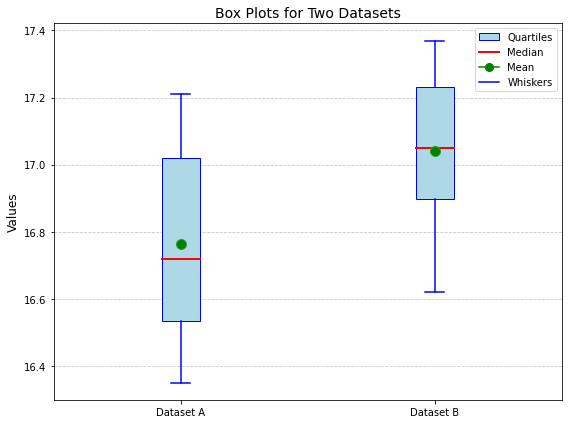

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def plot_box_plots_with_legend(data1, data2, labels=('Dataset A', 'Dataset B')):
    """
    Generate box plots for two datasets with a legend explaining the components.
    
    Parameters:
        data1, data2: Input datasets (array-like).
        labels: Tuple of labels for the datasets.
    """
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Combine the data into a list
    data = [data1, data2]

    # Create the box plot
    boxplot = ax.boxplot(data, labels=labels, patch_artist=True, showmeans=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='blue', linewidth=1.5),
                         capprops=dict(color='blue', linewidth=1.5),
                         meanprops=dict(marker='o', markerfacecolor='green', markersize=10))

    # Add title and labels
    ax.set_title('Box Plots for Two Datasets', fontsize=14)
    ax.set_ylabel('Values', fontsize=12)

    # Add gridlines for clarity
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Create legend
    median_patch = mlines.Line2D([], [], color='red', linewidth=2, label='Median')
    mean_patch = mlines.Line2D([], [], color='green', marker='o', markersize=8, label='Mean')
    box_patch = mpatches.Patch(facecolor='lightblue', edgecolor='blue', label='Quartiles')
    whisker_patch = mlines.Line2D([], [], color='blue', linestyle='-', linewidth=1.5, label='Whiskers')
    
    ax.legend(handles=[box_patch, median_patch, mean_patch, whisker_patch],
              loc='upper right', frameon=True, fontsize=10)

    # Show plot
    plt.tight_layout()
    plt.show()

# Example Usage
data_A = [16.85, 16.40, 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59, 16.57]
data_B = [16.62, 16.75, 17.37, 17.12, 16.98, 16.87, 17.34, 17.02, 17.08, 17.27]
plot_box_plots_with_legend(data_A, data_B, labels=('Dataset A', 'Dataset B'))